In [1]:
import keras

train, test = keras.datasets.cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
# 用 Keras 內建方法檢視模型各層參數量
model = build_mlp()
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.9361 - accuracy: 0.3029 - val_loss: 1.7877 - val_accuracy: 0.3616
Epoch 2/500
50000/50000 [==============================] - 1s 25us/step - loss: 1.7144 - accuracy: 0.3861 - val_loss: 1.7046 - val_accuracy: 0.3861
Epoch 3/500
50000/50000 [==============================] - 1s 25us/step - loss: 1.6228 - accuracy: 0.4232 - val_loss: 1.6250 - val_accuracy: 0.4238
Epoch 4/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.5523 - accuracy: 0.4485 - val_loss: 1.5614 - val_accuracy: 0.4417
Epoch 5/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.5081 - accuracy: 0.4616 - val_loss: 1.5010 - val_accuracy: 0.4668
Epoch 6/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.4721 - accuracy: 0.4740 - val_loss: 1.4772 - val_accuracy: 0.4675
Epoch 7/500
50000/50000 [==============================] - 1s 

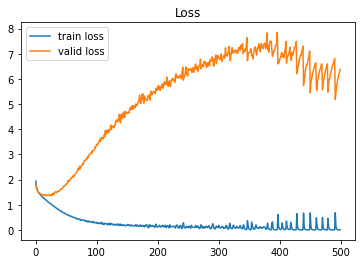

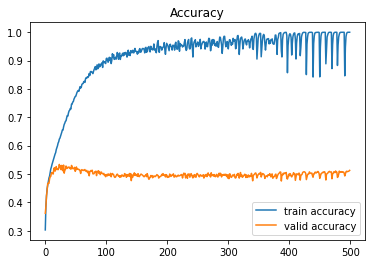

In [8]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [12]:
# 用 Keras 內建方法檢視模型各層參數量
model = build_mlp()
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.8557 - accuracy: 0.3358 - val_loss: 2.0147 - val_accuracy: 0.2663
Epoch 2/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.6484 - accuracy: 0.4145 - val_loss: 1.6770 - val_accuracy: 0.4100
Epoch 3/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.5529 - accuracy: 0.4533 - val_loss: 1.7934 - val_accuracy: 0.3851
Epoch 4/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.4948 - accuracy: 0.4691 - val_loss: 1.5624 - val_accuracy: 0.4450
Epoch 5/100
50000/50000 [==============================] - 1s 23us/step - loss: 1.4458 - accuracy: 0.4877 - val_loss: 1.5440 - val_accuracy: 0.4413
Epoch 6/100
50000/50000 [==============================] - 1s 23us/step - loss: 1.3973 - accuracy: 0.5053 - val_loss: 1.4301 - val_accuracy: 0.4867
Epoch 7/100
50000/50000 [==============================] - 1s 

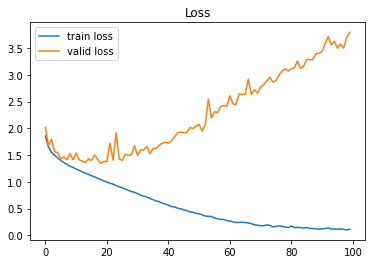

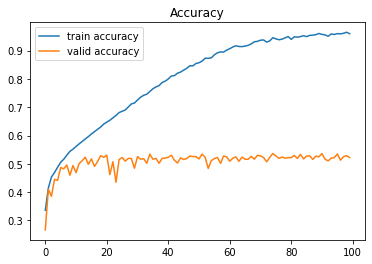

In [14]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()